<a href="https://colab.research.google.com/github/MaddalenaDona/Measles/blob/main/Figure8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy.core.function_base import linspace
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.linalg import solve_triangular
from scipy import optimize


def matrix(n): #function that creates the matrix of the coefficients of the triangular system (Th 2.2 Andresson and Britton)
#note: if we fix n=2, for example, then we need to compute $P_0,P_1,P_2$ so the system has dimension n+1
  A=np.zeros((n+1,n+1))
  for l in range(n+1): #row
    for k in range(l+1): #column
      #p=$p_L$ is the local infection probability
      A[l][k]=(math.comb(n-k,l-k))/((1-p)**((n-l)*(k+1))) #coefficient as in formula of Theorem 2.2 of Andresson & Britton, adapted to our case
  return(A)

def rhs(n): #function that creates a vector with the right hand side of the triangular system
  R=np.zeros(n+1) #the right hand side is a vector of dimension n+1
  for l in range(n+1):
    R[l]=math.comb(n,l)
  return(R)

p=1/5 #p_L probability of local infections
#p should NOT be treated as a parameter unless lambda_G is calculated as a function of it.
n=24 #number of unvax in the class-1 (one infected from outside, n susceptibles in the local epidemic)
lambdag=10.7 #$\lambda_G$ value corresponding to $p_L=1/5$
#print(matrix(n))
#print(rhs(n))
def solve(n):
  P=solve_triangular(matrix(n), rhs(n), lower=True) #vector of probabilities
  return P

P=solve(n)
#P[i]= given that there is 1 initial infective in a class and n unvaccinated, P[i] indicates
#the probability that in the end i will be infected (with probability of contact given by p, closed and homogeneous population)
#print(P)
#print(np.sum(P)) #needs to be 1

Text(0.5, 1.0, '$p_L=1/5$')

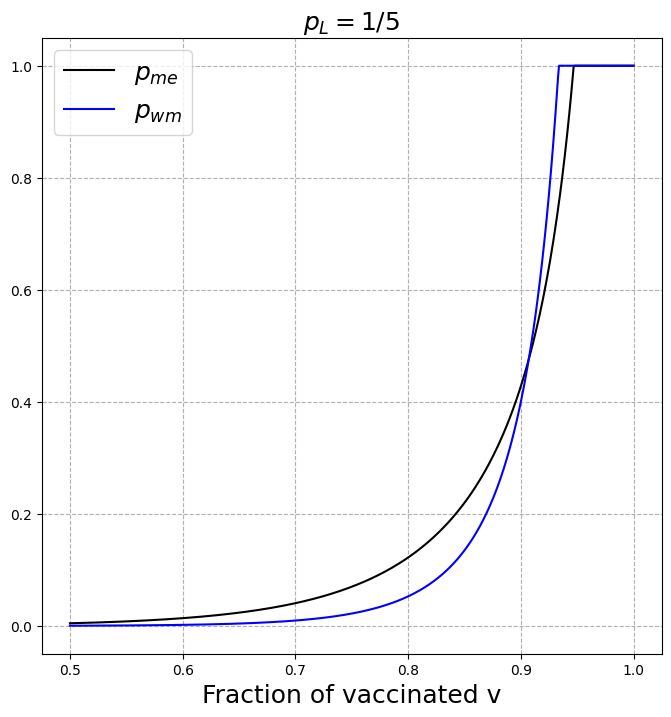

In [2]:
def g(z, v, pi): #finds Barq
  u=(1-v)/(1-pi)
  esp=np.exp(-lambdag*(1-v)*(1-z))
  Q=[]
  T=0
  for l in range(n+1): #l=0,..,n
    sum=0
    Q.append(solve(l)) #$Q[0]=[P^0_0]; Q[1]=[P^1_0, P^1_1], Q[2]=[P^2_0,P^2_1,P^2_2]$,..
    for j in range(l+1): #j=0,..,l
      #now I create the elements of the inner sum and add them up
      sum+=Q[l][j]*(esp**(j+1)) #Q[j] is a vector of probabilities of length j+1
    T+=math.comb(24,l)*(u**l)*((1-u)**(24-l))*sum
  z=T
  return z


def f (z,v,pi):
  x=np.exp(-lambdag*(1-v)*(1-z))
  return x

#v=0.9
v=np.linspace(0.5,1,500) #fraction of vaccinated
pi=0.5 #fraction of schools with a mandate
X=[]
Z=[]
X1=[]
#Y=[]
for i in range(len(v)):
  Z.append(optimize.fixed_point(g, 0.2, args=(v[i],pi), xtol=1e-03, maxiter=5000))
  X.append(f(Z[i],v[i],pi))
  X1.append(optimize.fixed_point(g, 0.2, args=(v[i],0), xtol=1e-03, maxiter=1000))


plt.figure(figsize=(8,8))
plt.plot(v,X,'k', label=r'$p_{me}$')
plt.plot(v,X1,'b', label=r'$p_{wm}$')
plt.grid(ls='--')
plt.xlabel('Fraction of vaccinated v', fontsize=18)
plt.legend(fontsize=18)
plt.title('$p_L=1/5$', fontsize=18)


#Crossing point:
#for i in range(len(v)-1):
 # if X[i]>X1[i] and X[i+1]<=X1[i+1]:
  #  print(v[i])